In [1]:
%matplotlib inline
from LandBase import *

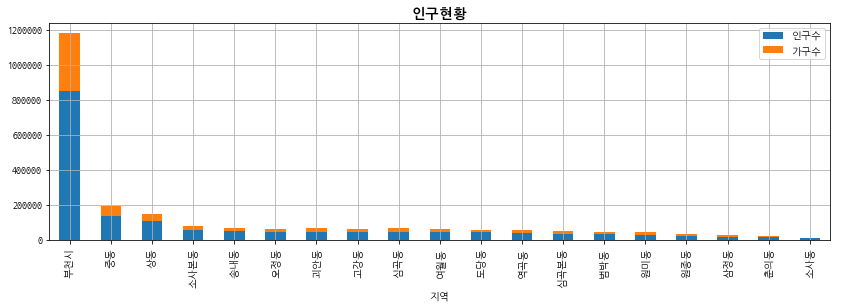

In [12]:
##############################
# 인구현황 - 인구수, 가구수
##############################
# DB Connection Open
con = get_db_connection()

# 데이터 조회해오기
sql = 'select '\
+'       yyyy as 년도,'\
+'       lawd_nm as 지역,'\
+'       sum(tot_population) as 인구수,'\
+'       sum(tot_household) as 가구수'\
+'  from ('\
+'        select yyyy, '\
+'               (select a.lawd_nm'\
+'                  from adm_law_map a'\
+'                 where a.admd_cd = p.admd_cd'\
+'                 order by a.from_dt desc'\
+'                 limit 1'\
+'               ) as lawd_nm,'\
+'               tot_population,'\
+'               tot_household'\
+'          from population_history p'\
+'         where admd_nm like \'경기도 부천시%\''\
+'           and tot_population > 0'\
+'           and yyyy = 2016'\
+'       ) s'\
+' group by yyyy, lawd_nm'
df = pd.read_sql(sql, con=con)
#df = df.pivot(index='지역', columns='년도', values='인구수')
#df = df.groupby(['지역','년도'])[['인구수','가구수']].sum()
df = df.groupby(['지역'])[['인구수','가구수']].sum()
df.sort_values(by='인구수', ascending=0, inplace=True)
df.plot(kind='bar', figsize=(14,4))
plt.title('인구현황', fontsize=14, fontweight='bold')

# DB Connection Close
disconnect_db(con)

#plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=10)

In [60]:
##############################
# 인구현황 - 인구수, 가구수, 65세 이상 비율
##############################
# DB Connection Open
con = get_db_connection()

# 데이터 조회해오기
sql = 'select '\
+'       yyyy as 년도,'\
+'       lawd_nm as 지역,'\
+'       sum(tot_population) as 인구수,'\
+'       sum(over65) as 65세이상,'\
+'       sum(tot_household) as 세대수,'\
+'       round(sum(tot_population)/sum(tot_household), 2) as 세대당인구수,'\
+'       concat(round(sum(over65)/sum(tot_population)*100), \'%\') as 65세이상비율'\
+'  from ('\
+'        select yyyy, '\
+'               (select sum('\
+'                       case when substr(term5, 1, 2) between \'65\' and \'95\' or term5 = \'100+\' '\
+'                       then tot_population'\
+'                       end)'\
+'                  from population_5term t'\
+'                 where t.admd_cd = p.admd_cd'\
+'                   and t.yyyy = p.yyyy'\
+'               ) as over65,'\
+'               (select a.lawd_nm'\
+'                  from adm_law_map a'\
+'                 where a.admd_cd = p.admd_cd'\
+'                 order by a.from_dt desc'\
+'                 limit 1'\
+'               ) as lawd_nm,'\
+'               tot_population,'\
+'               tot_household,'\
+'               cnt_per_household'\
+'          from population_history p'\
+'         where admd_nm like \'경기도 부천시%\' '\
+'           and tot_population > 0'\
+'           and yyyy = 2016'\
+'       ) p'\
+' group by yyyy, lawd_nm'\
+' order by 3 desc'
df = pd.read_sql(sql, con=con)
display('지역인구상세')
display(df)

# DB Connection Close
disconnect_db(con)


'지역인구상세'

,년도,지역,인구수,65세이상,세대수,세대당인구수,65세이상비율
0,2016,부천시,851380.0,NaN,331797.0,2.57,None
1,2016,중동,140071.0,11719.0,52178.0,2.68,8%
2,2016,상동,112047.0,7753.0,38150.0,2.94,7%
3,2016,소사본동,58044.0,6837.0,22408.0,2.59,12%
4,2016,송내동,52230.0,5387.0,19492.0,2.68,10%
5,2016,오정동,48092.0,4572.0,18143.0,2.65,10%
6,2016,괴안동,47862.0,6076.0,19493.0,2.46,13%
7,2016,고강동,47085.0,5668.0,19125.0,2.46,12%
8,2016,심곡동,46394.0,5123.0,23267.0,1.99,11%
9,2016,여월동,44495.0,4670.0,17069.0,2.61,10%


10세미만      10대      20대       30대       40대       50대  \
lawd_nm    yyyy                                                            
서울특별시 강남구  2014  43865.0  70862.0  85202.0  102316.0  104260.0   85908.0   
           2015  44866.0  68049.0  83293.0  100853.0  104137.0   84565.0   
           2016  43474.0  65096.0  81462.0   96435.0  103591.0   82609.0   
서울특별시 강동구  2014  38938.0  51268.0  67455.0   80050.0   79393.0   82207.0   
           2015  36953.0  46925.0  64161.0   74979.0   75941.0   78756.0   
           2016  34769.0  43398.0  61884.0   71347.0   73088.0   75740.0   
서울특별시 강북구  2014  23600.0  32328.0  43692.0   52086.0   57041.0   55353.0   
           2015  22657.0  30285.0  43412.0   49586.0   55637.0   55218.0   
           2016  21631.0  28351.0  43432.0   47400.0   54538.0   54834.0   
서울특별시 강서구  2014  50372.0  59005.0  83207.0  107111.0   95339.0   94041.0   
           2015  50383.0  55998.0  83941.0  106920.0   95417.0   93601.0   
           2016  50711.0  53550.0  85425.0  107459.0   96023.0   93154.0   
서울특별시 관악구  2014  34323.0  41005.0  93909.0  101385.0   79214.0   73370.0   
           2015  33191.0  38649.0  94582.0   98352.0   78122.0   72772.0   
           2016  31654.0  36374.0  97145.0   95116.0   77193.0   71901.0   
서울특별시 광진구  2014  26294.0  36833.0  59457.0   64436.0   61999.0   57356.0   
           2015  25934.0  34438.0  59063.0   63288.0   60793.0   56898.0   
           2016  25222.0  32260.0  59460.0   61798.0   59439.0   56510.0   
서울특별시 구로구  2014  38589.0  39315.0  57359.0   78938.0   69538.0   66991.0   
           2015  38029.0  37129.0  56806.0   75923.0   68645.0   66292.0   
           2016  36429.0  35381.0  56440.0   72401.0   68269.0   65600.0   
서울특별시 금천구  2014  16582.0  22375.0  34764.0   38992.0   40821.0   41651.0   
           2015  16328.0  20752.0  34550.0   37628.0   39528.0   41742.0   
           2016  15943.0  19417.0  34506.0   36817.0   38379.0   42149.0   
서울특별시 노원구  2014  46684.0  76023.0  78269.0   85843.0  107185.0   93246.0   
           2015  45452.0  71635.0  77604.0   82395.0  104721.0   92361.0   
           2016  44051.0  67824.0  77584.0   79345.0  102368.0   91272.0   
서울특별시 도봉구  2014  26166.0  38431.0  48464.0   51673.0   60454.0   61869.0   
           2015  25890.0  35801.0  47806.0   50550.0   59102.0   61270.0   
           2016  25106.0  33690.0  47217.0   48916.0   57768.0   60650.0   
...                  ...      ...      ...       ...       ...       ...   
서울특별시 성동구  2014  23378.0  27196.0  43436.0   51812.0   51042.0   47411.0   
           2015  23518.0  25795.0  43672.0   51194.0   50282.0   47842.0   
           2016  23593.0  24490.0  44196.0   51486.0   50163.0   48071.0   
서울특별시 성북구  2014  38257.0  46985.0  66278.0   74619.0   81624.0   72045.0   
           2015  37292.0  44817.0  65412.0   70999.0   80227.0   70884.0   
           2016  35453.0  43041.0  64375.0   67183.0   78758.0   69510.0   
서울특별시 송파구  2014  57462.0  75132.0  94820.0  116567.0  115438.0  105227.0   
           2015  56779.0  70908.0  93616.0  114278.0  113482.0  104466.0   
           2016  55694.0  67123.0  92874.0  113369.0  112606.0  103708.0   
서울특별시 양천구  2014  38765.0  66656.0  65285.0   70290.0   92141.0   80596.0   
           2015  39013.0  63344.0  65341.0   69223.0   90418.0   80215.0   
           2016  38397.0  59881.0  64116.0   67387.0   88277.0   79071.0   
서울특별시 영등포구 2014  29958.0  33377.0  55011.0   69305.0   62917.0   61097.0   
           2015  29502.0  31029.0  54712.0   68215.0   61493.0   60002.0   
           2016  28442.0  29116.0  53949.0   66187.0   59720.0   58350.0   
서울특별시 용산구  2014  17361.0  20949.0  31490.0   40729.0   41176.0   37012.0   
           2015  16967.0  19844.0  31451.0   39187.0   40283.0   36760.0   
           2016  16343.0  18815.0  31289.0   38159.0   39497.0   35996.0   
서울특별시 은평구  2014  40171.0  52005.0  65053.0   81982.0   86118.0   79000.0   
           2015  39466.0  49456.0  65211.0   80013.0   85631.0   78

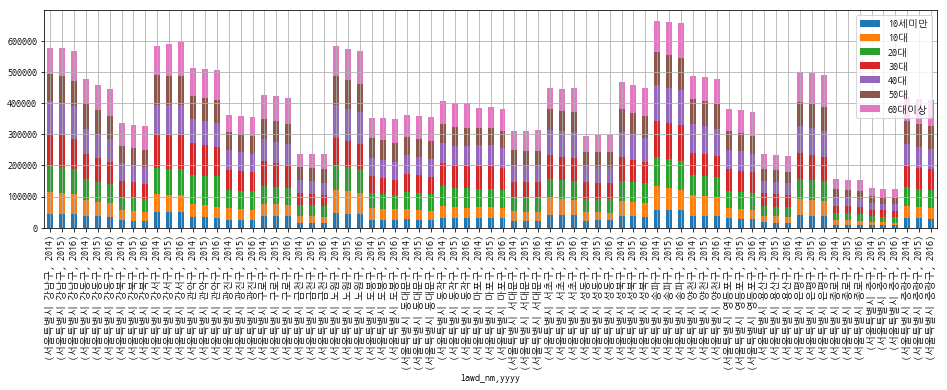

In [36]:
##############################
# 인구현황 - 세대별 인구 비중
##############################
# DB Connection Open
con = get_db_connection()

# 데이터 조회해오기
sql = 'select lawd_nm,'\
+'        yyyy,'\
+'        sum(case generation when \'10세미만\' then tot_population end) as 10세미만,'\
+'        sum(case generation when \'10대\' then tot_population end) as 10대,'\
+'        sum(case generation when \'20대\' then tot_population end) as 20대,'\
+'        sum(case generation when \'30대\' then tot_population end) as 30대,'\
+'        sum(case generation when \'40대\' then tot_population end) as 40대,'\
+'        sum(case generation when \'50대\' then tot_population end) as 50대,'\
+'        sum(case generation when \'60대이상\' then tot_population end) as 60대이상'\
+'        /*sum(tot_population) as 계*/ '\
+'  from ('\
+'        select yyyy,'\
+'                admd_cd,'\
+'                case substr(admd_cd, 1, 2) '\
+'                when \'11\' then concat(\'서울특별시 \', trim(admd_nm))'\
+'                when \'28\' then concat(\'인천광역시 \', trim(admd_nm))'\
+'                when \'41\' then concat(\'경기도 \', trim(admd_nm))'\
+'                end as lawd_nm,'\
+'                case term5 '\
+'                when \'0 - 4세\' then \'10세미만\''\
+'                when \'5 - 9세\' then \'10세미만\''\
+'                when \'10 - 14세\' then \'10대\''\
+'                when \'15 - 19세\' then \'10대\''\
+'                when \'20 - 24세\' then \'20대\''\
+'                when \'25 - 29세\' then \'20대\''\
+'                when \'30 - 34세\' then \'30대\''\
+'                when \'35 - 39세\' then \'30대\''\
+'                when \'40 - 44세\' then \'40대\''\
+'                when \'45 - 49세\' then \'40대\''\
+'                when \'50 - 54세\' then \'50대\''\
+'                when \'55 - 59세\' then \'50대\''\
+'                else case when term5 != \'계\' then \'60대이상\' end'\
+'                end as generation,'\
+'                tot_population'\
+'        from population_5term t'\
+'        where char_length(admd_cd) = 5'\
+'  ) s '\
+' where lawd_nm like \'서울%\' '\
+'   and yyyy in (2014, 2015, 2016) '\
+' group by lawd_nm, yyyy '\
+' /*having sum(tot_population) > 500000*/'
df = pd.read_sql(sql, con=con, index_col=['lawd_nm', 'yyyy'])
#df.sort_values(by='40대', ascending=0, inplace=True)
display(df)
df.plot(kind='bar', stacked=True, figsize=(16,4))
#plt.title('세대현황', fontsize=14, fontweight='bold')

# DB Connection Close
disconnect_db(con)
